In [2]:
%matplotlib inline
import pyximport

import warnings
warnings.filterwarnings('ignore')
from importlib import reload

import sys
import os
sys.path.insert(0,os.path.join(os.getcwd(),os.pardir))
from qutip import *
import numpy as np
pyximport.install(setup_args={"include_dirs":np.get_include()})
import matplotlib.pyplot as plt
import LH_tools as LHT
import dorit.XXZZham as XXZZham
from dorit.XXZZham import add_high_energies, rotate_to_00_base
import random
import adiabatic_sim as asim
from IPython.display import display,Math,Latex
import scipy
import Code_hams as CH

Start with the uniform-perp projection
and adiabaticly evolve to our code

In [3]:
n, m = 5,8
# generate the uniform-perp projector
zero_m = LHT.create_vector_from_string("0" * m )
uniform_m = hadamard_transform(m) * zero_m
H0_U = LHT.proj_orth(uniform_m)
# generate our code
Hcode,code,min_weight = CH.generate_random_code_hamiltonian(n, m)
Hnoise,min_weight_noised = CH.generate_noised_hamiltonian(code,np.sqrt(2**m))

 There are four hamiltonians 
 $$H0_{\sum-}= \sum_{i=0}^{i=m}\left|-\right>_i\left<-\right|_i$$
 $$H0_{U}= I-\left|\phi\right>\left<\phi\right|  \ \ where \  \left|\phi\right> = \frac{1}{2^m}\sum_{comp\ basis} \left|i\right>$$ 
 $$H_{code}$$
 and 
 $$H_{noise}$$

 we wish to examine the gaps and processes between the two former and two latter

In [4]:
# Generate H0 as sigma |->_i 
terms = []
#probably faster to use LHT.LocalOperator({i:sigmaz() * hadamard_transform(1)}) for each i , but thats still fast enough
for i in range(1,m+1):
    minus_i_op = LHT.LocalOperator({i:sigmaz() * hadamard_transform(1)})
    minus_i = minus_i_op.full_form(m) * zero_m
    terms.append(LHT.proj_on(minus_i))
H0_sum_minus = sum(terms)

In [14]:

display(Math("From\ H0_{U}\ to "))
display(Math("H_{code}:"))
print("gap %f at s=%f" % asim.find_min_gap(H0_U, Hcode,initial_resolution=4))
display(Math("H_{noise}:"))
print("gap %f at s=%f" % asim.find_min_gap(H0_U, Hnoise,initial_resolution=4))

display(Math("From\ H0_{\sum}\ to "))
display(Math("H_{code}:"))
print("gap %f at s=%f" % asim.find_min_gap(H0_sum_minus, Hcode, initial_resolution=4))
display(Math("H_{noise}:"))
print("gap %f at s=%f" % asim.find_min_gap(H0_sum_minus, Hnoise,initial_resolution=4))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

gap 0.000000 at s=1.000000


<IPython.core.display.Math object>

gap 0.030544 at s=0.194454


<IPython.core.display.Math object>

<IPython.core.display.Math object>

gap 0.000000 at s=0.000000


<IPython.core.display.Math object>

gap 0.000000 at s=0.000001


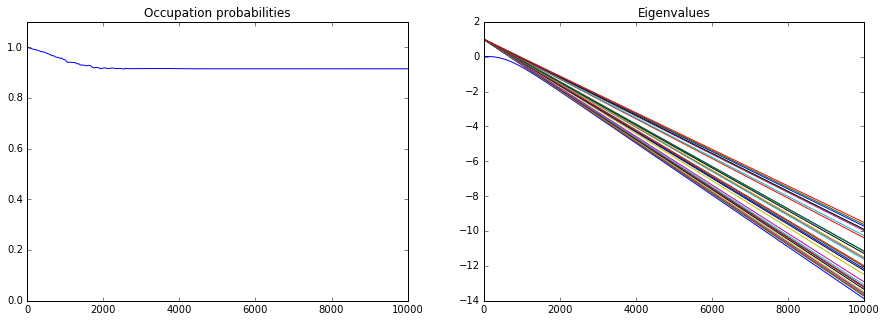

[array([ 0.91472284])]

In [34]:
tlist = np.linspace(0,10000,200)
psi_plus = hadamard_transform(m) * zero_m
P_mat, eigvals_mat, psis= asim.sim_degenerate_adiabatic(tlist, H0_U, Hnoise,uniform_m,max_degen=2**n-1)
LHT.plot_PandEV(P_mat, eigvals_mat, tlist)
plt.show()
P_mat[-1]

In [9]:
LHT.find_degeneracy(Hcode)

2

In [ ]:
tlist = np.linspace(0,100,30)
P_mat, eigvals_mat, psis= asim.sim_degenerate_adiabatic(tlist, H0_uniform_m, Hcode, uniform_m,max_degen=2**n-1)
LHT.plot_PandEV(P_mat, eigvals_mat, tlist)
plt.show()

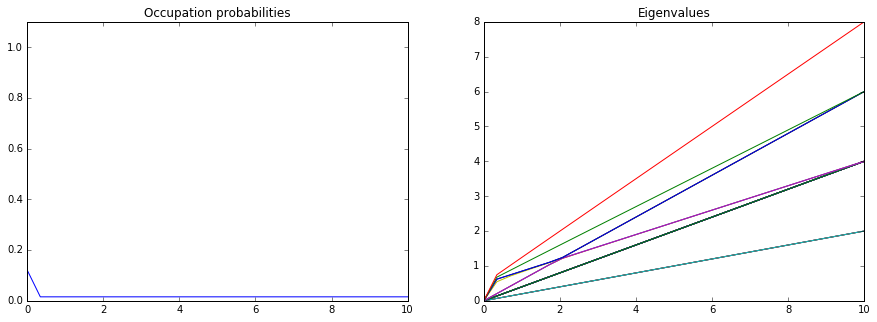

In [51]:
tlist = np.linspace(0,10,30)
P_mat, eigvals_mat, psis= asim.sim_degenerate_adiabatic(tlist, H0, H1, uniform_m,max_degen=2**n-1)
LHT.plot_PandEV(P_mat, eigvals_mat, tlist)
plt.show()

In [67]:
H1n,min_weight = CH.generate_noised_hamiltonian(code,np.sqrt(2**m))

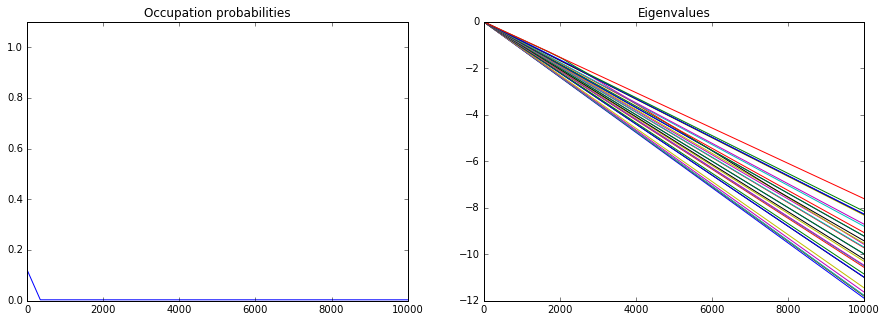

In [77]:
tlist = np.linspace(0,10000,30)
P_mat, eigvals_mat, psis= asim.sim_degenerate_adiabatic(tlist, H0, H1n, uniform_m,max_degen=2**n-1)
LHT.plot_PandEV(P_mat, eigvals_mat, tlist)
plt.show()

In [71]:
H1n.eigenstates()

(array([ -1.18916270e+01,  -1.18033690e+01,  -1.17807316e+01,
         -1.17703510e+01,  -1.16303271e+01,  -1.14468560e+01,
         -1.09959935e+01,  -1.09855061e+01,  -1.08513712e+01,
         -1.05649682e+01,  -1.05048152e+01,  -1.04756480e+01,
         -1.03046160e+01,  -1.02116883e+01,  -9.99326932e+00,
         -9.98661920e+00,  -9.72327959e+00,  -9.69796319e+00,
         -9.57528187e+00,  -9.52961897e+00,  -9.42372895e+00,
         -9.22345808e+00,  -9.21854235e+00,  -9.06735735e+00,
         -8.79866491e+00,  -8.70822790e+00,  -8.32060231e+00,
         -8.28433469e+00,  -8.27168159e+00,  -8.15299610e+00,
         -7.61116269e+00,  -7.53987926e+00,  -7.40981289e+00,
         -7.12628528e+00,  -6.76707647e+00,  -6.64868792e+00,
         -6.60098962e+00,  -6.58999407e+00,  -6.38235106e+00,
         -6.33337114e+00,  -6.24640071e+00,  -6.24086218e+00,
         -6.21483324e+00,  -6.06986930e+00,  -5.93501183e+00,
         -5.89940195e+00,  -5.68911167e+00,  -5.62531729e+00,
        

In [72]:
H0_proj_unif = LHT.proj_orth(uniform_m)

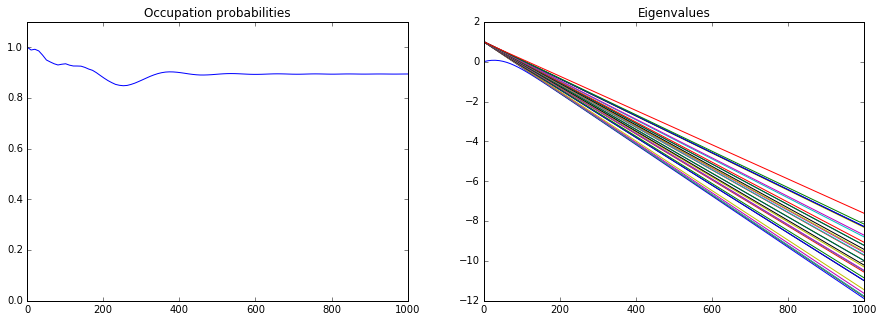

In [79]:
tlist = np.linspace(0,1000,100)
P_mat, eigvals_mat, psis= asim.sim_degenerate_adiabatic(tlist, H0_proj_unif, H1n, uniform_m,max_degen=2**n-1)
LHT.plot_PandEV(P_mat, eigvals_mat, tlist)
plt.show()

In [91]:
print("Using uniform projection")
print("With noise " , asim.find_min_gap(H0_proj_unif, H1,initial_resolution=4))
print("Without noise " , asim.find_min_gap(H0_proj_unif, H1n,initial_resolution=4))

Using uniform projection
With noise  (0.0, 1)
Without noise  (0.021969267131174641, 0.2245382089795761)
